In [32]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
print(type(iris.data))
print(type(iris.target))
print(len(iris.target))
print(iris.data.shape)
def get_acc(model):
    pred_labels = model.predict(iris.data)
    corr_cnt = 0
    for i in range(len(iris.target)):
        if pred_labels[i] == 1:
            pred_labels[i] = 2
        elif pred_labels[i] == 2:
            pred_labels[i] = 1
        '''
        label-switch for some bugs:
        the model mistake the label `1` for `2`
        '''
        if iris.target[i] == pred_labels[i]:
            corr_cnt += 1
    return corr_cnt / len(iris.target)




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
150
(150, 4)


Gaussian1& feature1 & feature2 & feature3 & feature4 \\
\hline
feature1&0.12176499999999997&0.09723199999999989&0.016027999999999973&0.010124000000000005\\
\hline
feature2&0.09723199999999989&0.14081699999999964&0.01146399999999994&0.009112000000000025\\
\hline
feature3&0.016027999999999973&0.01146399999999994&0.029556999999999993&0.005948000000000005\\
\hline
feature4&0.010124000000000005&0.009112000000000025&0.005948000000000006&0.010885000000000008\\
\hline
Gaussian2& feature1 & feature2 & feature3 & feature4 \\
\hline
feature1&0.38744092783846173&0.09223275515347401&0.3024430207201765&0.06087396923326452\\
\hline
feature2&0.09223275515347401&0.11040913522103273&0.08385111880047248&0.05574334203172931\\
\hline
feature3&0.3024430207201764&0.0838511188004725&0.3258957418180867&0.07276775904883839\\
\hline
feature4&0.06087396923326451&0.05574334203172931&0.07276775904883839&0.08484505047999581\\
\hline
Gaussian3& feature1 & feature2 & feature3 & feature4 \\
\hline
feature1&0.2755170999

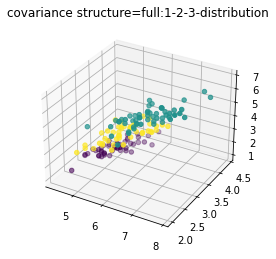

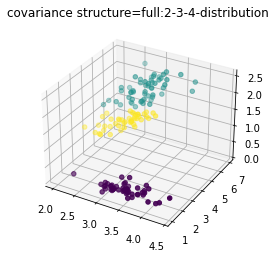

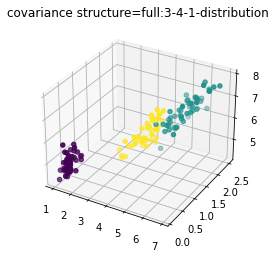

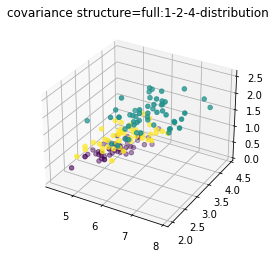

In [51]:
covar_type = 'full'
gm = GaussianMixture(n_components=3, random_state=0, covariance_type=covar_type).fit(iris.data,iris.target)
#print(covar_type+'--mean:',gm.means_)
#print(covar_type+'--covariance:', gm.covariances_)
for i in range(gm.covariances_.shape[0]):
    print('Gaussian'+str(i+1)+"& feature1 & feature2 & feature3 & feature4 \\\\")
    print('\hline')
    covar = gm.covariances_[i]
    for j in range(covar.shape[0]):
        print('feature'+str(j+1)+'&'+str(float(covar[j][0]))
        +'&'+str(float(covar[j][1]))
        +'&'+str(float(covar[j][2]))
        +'&'+str(float(covar[j][3]))
        +'\\'+'\\')
        print('\hline')
print(covar_type+'--weight:',gm.weights_)
print(covar_type+'--acc:',get_acc(gm))
for i in range(3):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
    ax.scatter(iris.data[:, i], iris.data[:, (i + 1) % 4], iris.data[:, (i + 2) % 4], c=gm.predict(iris.data))
    plt.title("covariance structure="+covar_type+":"+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+'-distribution')
    plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+".png")
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=gm.predict(iris.data))
plt.title("covariance structure="+covar_type+":"+str(1)+'-'+str(2)+'-'+str(4)+'-distribution')
plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(1)+'-'+str(2)+'-'+str(4)+".png")






tied--mean: [[5.006      3.428      1.462      0.246     ]
 [6.59293638 2.99716202 5.55284949 2.05143145]
 [5.95728298 2.75675429 4.31039897 1.33031316]]
tied--covariance: [[0.2633317  0.08760867 0.1731573  0.0374331 ]
 [0.08760867 0.11040074 0.04836891 0.02701142]
 [0.1731573  0.04836891 0.20285285 0.04347376]
 [0.0374331  0.02701142 0.04347376 0.03619053]]
feature1&0.263331700398019&0.08760866750172987&0.17315729974004476&0.03743309815944638\\
\hline
feature2&0.08760866750172987&0.11040074252195713&0.04836891387035546&0.027011423996912833\\
\hline
feature3&0.17315729974004174&0.04836891387035546&0.20285285254138927&0.04347376256154576\\
\hline
feature4&0.03743309815944638&0.027011423996912833&0.04347376256154576&0.03619052614733872\\
\hline
tied--weight: [0.33333333 0.31958404 0.34708263]
tied--acc: 0.96


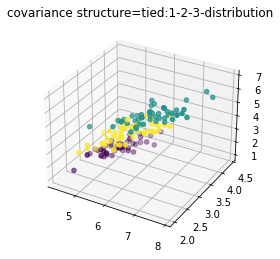

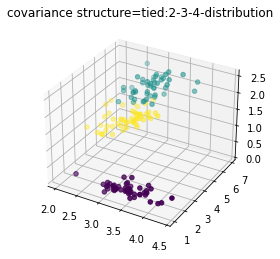

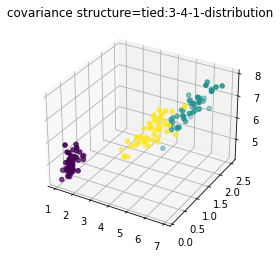

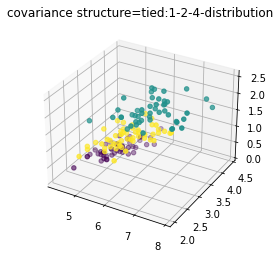

In [52]:
covar_type = 'tied'
gm = GaussianMixture(n_components=3, random_state=0, covariance_type=covar_type).fit(iris.data,iris.target)
print(covar_type+'--mean:',gm.means_)
print(covar_type+'--covariance:', gm.covariances_)
covar = gm.covariances_
for j in range(covar.shape[0]):
        print('feature'+str(j+1)+'&'+str(float(covar[j][0]))
        +'&'+str(float(covar[j][1]))
        +'&'+str(float(covar[j][2]))
        +'&'+str(float(covar[j][3]))
        +'\\'+'\\')
        print('\hline')
print(covar_type+'--weight:',gm.weights_)
print(covar_type+'--acc:',get_acc(gm))
for i in range(3):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
    ax.scatter(iris.data[:, i], iris.data[:, (i + 1) % 4], iris.data[:, (i + 2) % 4], c=gm.predict(iris.data))
    plt.title("covariance structure="+covar_type+":"+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+'-distribution')
    plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+".png")
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=gm.predict(iris.data))
plt.title("covariance structure="+covar_type+":"+str(1)+'-'+str(2)+'-'+str(4)+'-distribution')
plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(1)+'-'+str(2)+'-'+str(4)+".png")

diag--mean: [[5.006      3.428      1.462      0.246     ]
 [6.8060823  3.07023103 5.71889409 2.10305305]
 [5.92570673 2.74947486 4.40355614 1.41204165]]
diag--covariance: [[0.121765   0.140817   0.029557   0.010885  ]
 [0.28520059 0.08200975 0.25128562 0.06109484]
 [0.23145596 0.08738014 0.27563102 0.0688713 ]]
diag--weight: [0.33333333 0.25465894 0.41200772]
diag--acc: 0.9


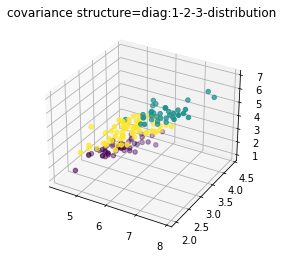

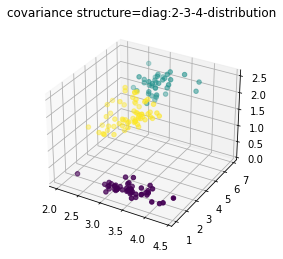

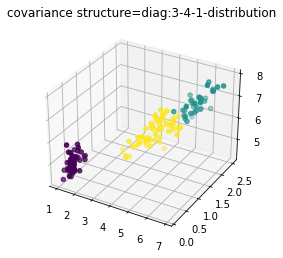

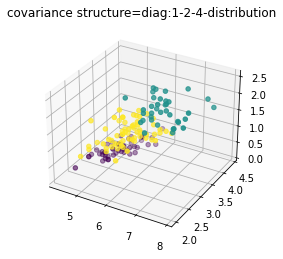

In [43]:
covar_type = 'diag'
gm = GaussianMixture(n_components=3, random_state=0, covariance_type=covar_type).fit(iris.data,iris.target)
print(covar_type+'--mean:',gm.means_)
print(covar_type+'--covariance:', gm.covariances_)
print(covar_type+'--weight:',gm.weights_)
print(covar_type+'--acc:',get_acc(gm))
for i in range(3):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
    ax.scatter(iris.data[:, i], iris.data[:, (i + 1) % 4], iris.data[:, (i + 2) % 4], c=gm.predict(iris.data))
    plt.title("covariance structure="+covar_type+":"+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+'-distribution')
    plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+".png")
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=gm.predict(iris.data))
plt.title("covariance structure="+covar_type+":"+str(1)+'-'+str(2)+'-'+str(4)+'-distribution')
plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(1)+'-'+str(2)+'-'+str(4)+".png")

spherical--mean: [[5.006      3.428      1.462      0.246     ]
 [6.84191531 3.0717748  5.72292746 2.07049253]
 [5.90165943 2.74786641 4.39838776 1.43087513]]
spherical--covariance: [0.075756   0.1644286  0.16244304]
spherical--weight: [0.33333333 0.25549114 0.41117552]
spherical--acc: 0.8933333333333333


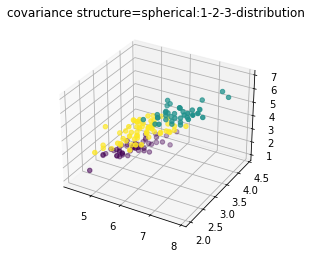

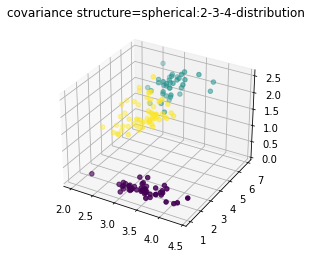

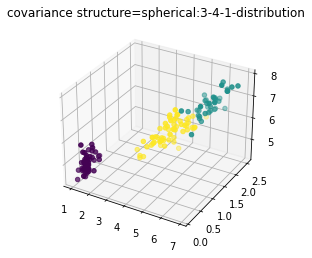

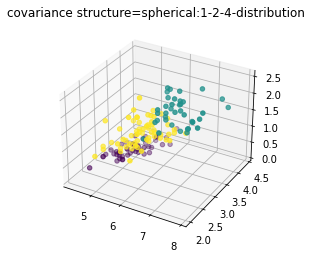

In [44]:
covar_type = 'spherical'
gm = GaussianMixture(n_components=3, random_state=0, covariance_type=covar_type).fit(iris.data,iris.target)
print(covar_type+'--mean:',gm.means_)
print(covar_type+'--covariance:', gm.covariances_)
print(covar_type+'--weight:',gm.weights_)
print(covar_type+'--acc:',get_acc(gm))
for i in range(3):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
    ax.scatter(iris.data[:, i], iris.data[:, (i + 1) % 4], iris.data[:, (i + 2) % 4], c=gm.predict(iris.data))
    plt.title("covariance structure="+covar_type+":"+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+'-distribution')
    plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(i + 1)+'-'+str((i + 1) % 4 + 1)+'-'+str((i+2) % 4+1)+".png")
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=gm.predict(iris.data))
plt.title("covariance structure="+covar_type+":"+str(1)+'-'+str(2)+'-'+str(4)+'-distribution')
plt.savefig("/data2/home/zhaoyi/labs/USTC-labs/applied_math_assignment1/results/gmm/"+covar_type+str(1)+'-'+str(2)+'-'+str(4)+".png")